# Assignment 9: Implement Dynamic Programming

In this exercise, we will begin to explore the concept of dynamic programming and how it related to various object containers with respect to computational complexity.  

## Deliverables:

 

    1) Choose and implement a Dynamic Programming algorithm in Python, make sure you are using a Dynamic Programming solution (not another one).

    2) Use the algorithm to solve a range of scenarios.  
    
    3) Explain what is being done in the implementation.  That is, write up a walk through of the algorithm and explain how it is a Dynamic Programming solution.



    
### Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

# A. The Dynamic programming problem: Longest Increasing Sequence


###  The Longest Increasing Subsequence (LIS) problem is to find the length of the longest subsequence of a given sequence such that all elements of the subsequence are sorted in increasing order. For example, the length of LIS for {10, 22, 9, 33, 21, 50, 41, 60, 80} is 6 and LIS is {10, 22, 33, 50, 60, 80}. 

# A. Setup: Library imports and Algorithm

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import time
#import itertools

import random
import matplotlib.pyplot as plt
#import networkx as nx
#import pydot
#from networkx.drawing.nx_pydot import graphviz_layout

#from collections import deque


In [2]:
# Dynamic Programming Approach of Finding LIS by reducing the problem to longest common Subsequence
 
def lis(a):
    n=len(a) #get the length of the list
   
    b=sorted(list(set(a))) #removes duplicates, and sorts list
    m=len(b)  #gets the length of the truncated and sorted list
     
    dp=[[-1 for i in range(m+1)] for j in range(n+1)]  #instantiates a list of lists filled with -1 columns are indicies of the sorted array; rows the original array
     
    for i in range(n+1): # for every column in the table at each row:
             
        for j in range(m+1):
            if i==0 or j==0: #if at first element in either a row or column set the table row,index to zero
                dp[i][j]=0 
            elif a[i-1]==b[j-1]: #else if the sorted array value matches the original array:
                dp[i][j]=1+dp[i-1][j-1]#sets dp[i][j] to 1+prveious cell of the dyanmic table
            else:
                dp[i][j]=max(dp[i-1][j],dp[i][j-1]) #else record the max of the row or column for that cell in the cell
    return dp[-1][-1] # This will return the max running sequence.
     
# Driver program to test above function
arr1 = [10, 22, 9, 33, 21, 50, 41, 60]
len_arr1 = len(arr1)
print("Longest increaseing sequence has a length of:", lis(arr1))
# addtional comments included from the original code contributed by Dheeraj Khatri (https://www.geeksforgeeks.org/longest-increasing-subsequence-dp-3/)    


def Container(arr, fun):  ### I'm glad I was able to reuse this from assignment 3 and 4. Useful function.
    objects = [] #instantiates an empty list to collect the returns
    times = [] #instantiates an empty list to collect times for each computation
    for t in arr:
        start= time.perf_counter() #collects the start time
        obj = fun(t) # applies the function to the arr object
        end = time.perf_counter() # collects end time
        duration = (end-start)* 1E3 #converts to milliseconds
        objects.append(obj)# adds the returns of the functions to the objects list
        times.append(duration) # adds the duration for computation to list
    return objects, times




Longest increaseing sequence has a length of: 5


# B. Test Array Generation

In [3]:
RANDOM_SEED = 300

np.random.seed(RANDOM_SEED)    
arr100 = list(np.random.randint(low=1, high= 5000, size=100))

np.random.seed(RANDOM_SEED)    
arr200 = list(np.random.randint(low=1, high= 5000, size=200))


np.random.seed(RANDOM_SEED)    
arr400 = list(np.random.randint(low=1, high= 5000, size=400))


np.random.seed(RANDOM_SEED)    
arr600 = list(np.random.randint(low=1, high= 5000, size=600))

np.random.seed(RANDOM_SEED)    
arr800 = list(np.random.randint(low=1, high= 5000, size=800))

print(len(arr100), len(arr200), len(arr400), len(arr600), len(arr800))





100 200 400 600 800


In [4]:
arr_list = [arr100, arr200, arr400, arr600, arr800]

metrics = Container(arr_list, lis)

### Table1. Performance Summary

In [5]:
summary = {
    'ArraySize' : [len(arr100), len(arr200), len(arr400), len(arr600), len(arr800)],    
    'SequenceLength' : [metrics[0][0],metrics[0][1], metrics[0][2], metrics[0][3], metrics[0][4]],
    'Time(ms)' : [metrics[1][0],metrics[1][1], metrics[1][2], metrics[1][3], metrics[1][4]]
}

df =pd.DataFrame(summary)
df

,ArraySize,SequenceLength,Time(ms)
0,100,19,10.4795
1,200,24,24.0603
2,400,33,111.5168
3,600,41,241.3161
4,800,49,496.1164


### Figure 1. Performance

<AxesSubplot:xlabel='Time(ms)', ylabel='ArraySize'>

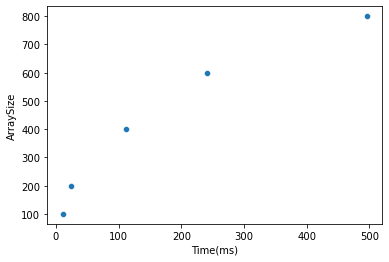

In [6]:
sns.scatterplot(data=df, x='Time(ms)', y='ArraySize')


# Discussion

    Explain what is being done in the implementation.  That is, write up a walk through of the algorithm and explain how it is a Dynamic Programming solution.


The dyanamic programming problem above finds the length of the longest incrementing sequence of values in a list. The defined function makes a sorted copy of the list containing only unique values and also creates a dynamic table (in the form of a list of lists) using a nested list comprehension. This table contains the incidices of the sorted array as columns and the indicies of the original array as rows. To begin, the table is instantiated with values of -1. The value of zero indicies are set to zero in the dynamic table and if a given index in the original array is found to be increasing the dyanamic table is incremented. until all positions are assessed. The funciton then returns the maximum value of the increments which will be the length of the longest running sequence. This is a dynamic progromming problem because the solution builds on a smaller subset problems. 

Dyanmic programming is an important concept for developers and engineers. Functions and programs that use dynamic programming help solve problems which present themselves as factorial time complexity in a more efficient way. At face value, it appears that this problem of the longest incrementing sequence will have to compare all values in a given array to all previous values in the array. Dyanmic programming allows for a shortcut in a sense. We can compare the given array with a sorted version of that array and at the intersection of the sorted and unsorted arrays we can determine if we need to make an additon to our incrementing sequence tally. 

Shown above in table and figure 1 is the time required for the algorithm to tally the longest running sequence for various array sizes. Because the algorithm utilizes a nested for loop it is the expeictation that the time will grow as a function of the square of the original array length. This is confirmed when inspecting the scatterplot in figure 1. Thus, the developed algorithm in big O notation is O(n^2) time complexity which is much more efficient than factorial time.